![portada](images/boston.png)

# Boston Housing Mini Project

## ¿Qué tienes que hacer?
- Explorar el dataset
- Buscar correlación entre variables
- Hacer plots explicativos de tus hipótesis
- Entender las variables
- Probar modelos de regresión con todas, algunas o una variable ... (según consideres)
- Revisar las métricas aprendidas en clase (R2 y R2ajustado)
- ¡¡Practicar lo que hemos visto en clase!!
- Sobre todo, disfrutar y subirte en el cohete 🚀🔥

### Librerías

Recordad que lo primero es importar las librerías

In [7]:
#importa aquí todo lo que necesites
import pandas as pd
from sklearn.datasets import load_boston

import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import axes3d
from matplotlib import cm
%matplotlib inline
%config Inlinebackend.figure_format = 'retina'

import seaborn as sns
sns.set_context('poster')
sns.set(rc={'figure.figsize': (16., 9.)})
sns.set_style('whitegrid')

# Modeling libraries
import statsmodels.formula.api as smf # welcome!!
from sklearn.linear_model import LinearRegression

import pandas as pd
np.random.seed(123)

### Datitos

Os dejamos los datos cargados 🏡

In [8]:
boston_dataset = load_boston()

In [9]:
boston = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [10]:
boston['MEDV'] = boston_dataset.target

In [19]:
boston.sample(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
366,3.69695,0.0,18.10,0.0,0.718,4.963,91.4,1.7523,24.0,666.0,20.2,316.03,14.00,21.9
272,0.11460,20.0,6.96,0.0,0.464,6.538,58.7,3.9175,3.0,223.0,18.6,394.96,7.73,24.4
232,0.57529,0.0,6.20,0.0,0.507,8.337,73.3,3.8384,8.0,307.0,17.4,385.91,2.47,41.7
362,3.67822,0.0,18.10,0.0,0.770,5.362,96.2,2.1036,24.0,666.0,20.2,380.79,10.19,20.8
259,0.65665,20.0,3.97,0.0,0.647,6.842,100.0,2.0107,5.0,264.0,13.0,391.93,6.90,30.1
181,0.06888,0.0,2.46,0.0,0.488,6.144,62.2,2.5979,3.0,193.0,17.8,396.90,9.45,36.2
417,25.94060,0.0,18.10,0.0,0.679,5.304,89.1,1.6475,24.0,666.0,20.2,127.36,26.64,10.4
105,0.13262,0.0,8.56,0.0,0.520,5.851,96.7,2.1069,5.0,384.0,20.9,394.05,16.47,19.5
352,0.07244,60.0,1.69,0.0,0.411,5.884,18.5,10.7103,4.0,411.0,18.3,392.33,7.79,18.6
57,0.01432,100.0,1.32,0.0,0.411,6.816,40.5,8.3248,5.0,256.0,15.1,392.90,3.95,31.6


In [38]:
boston.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


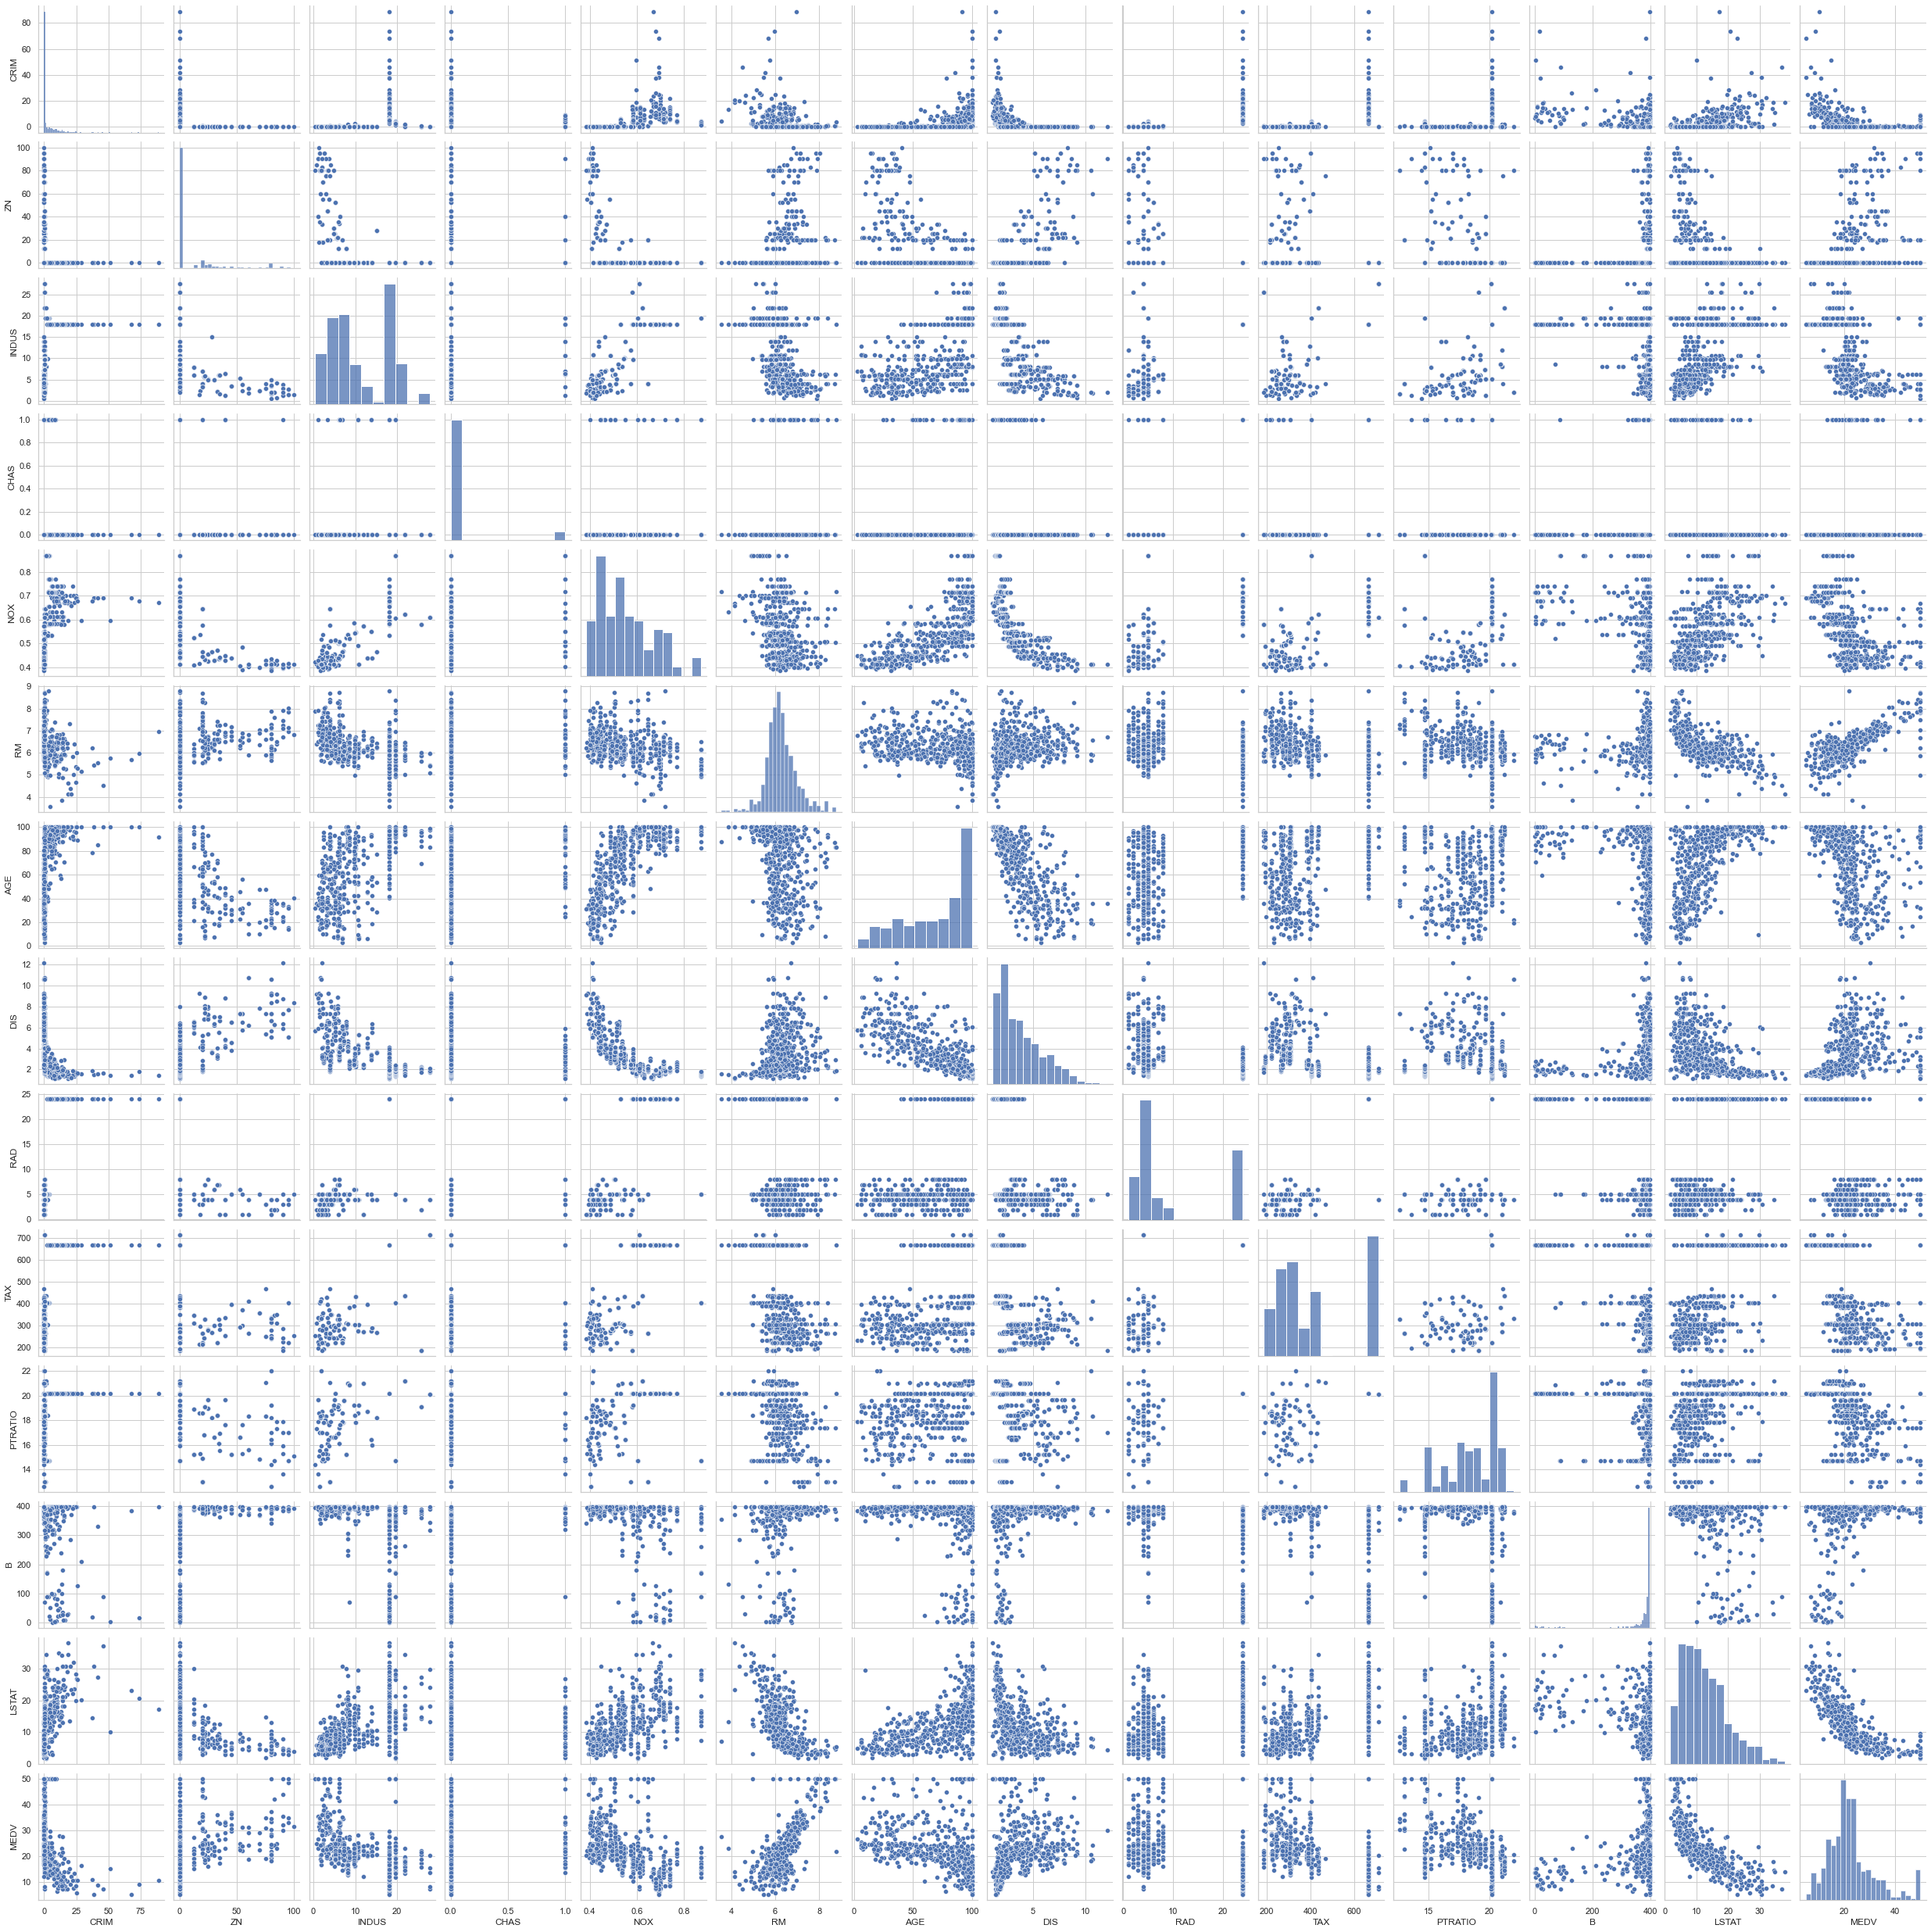

In [46]:
sns.pairplot(boston)

Aplicaremos un forward stepwise selection, por lo tanto empezaremos con un modelo sin variables, únicamente el intercept. 

Pero antes vamos a echarle un ojo a los p-values de cada una de las variables a ver como son de significativas a la hora de definir MEDV. 

In [14]:
results = smf.ols("MEDV ~ CRIM + ZN + INDUS + CHAS + NOX + RM + AGE + DIS + RAD + TAX + PTRATIO + B + LSTAT", data = boston).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Tue, 24 Nov 2020   Prob (F-statistic):          6.72e-135
Time:                        16:35:08   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.4595      5.103      7.144      0.000      26.432      46.487
CRIM          -0.1080      0.033     -3.287      0.001      -0.173      -0.043
ZN             0.0464      0.014      3.382      0.001       0.019       0.073
INDUS          0.0206      0.061      0.334      0.738      -0.100       0.141
CHAS           2.6867      0.862      3.118      0.002       0.994       4.380
NOX          -17.7666      3.820     -4.651      0.000     -25.272     -10.262
RM             3.8099      0.418      9.116      0.000       2.989       4.631
AGE            0.0007      0.013      0.052      0.958      -0.025       0.027
DIS           -1.4756      0.199     -7.398      0.000      -1.867      -1.084
RAD            0.3060      0.066      4.613      0.000       0.176       0.436
TAX           -0.0123      0.004     -3.280      0.001      -0.020      -0.005
PTRATIO       -0.9527      0.131     -7.283      0.000      -1.210      -0.696
B              0.0093      0.003      3.467      0.001       0.004       0.015
LSTAT         -0.5248      0.051    -10.347      0.000      -0.624      -0.425
==============================================================================
Omnibus:                      178.041   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              783.126
Skew:                           1.521   Prob(JB):                    8.84e-171
Kurtosis:                       8.281   Cond. No.                     1.51e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

De primeras vemos que hay dos variables: AGE y INDUS que la influencia que estan teniendo en el precio de la vivienda es meramente causal o aleatoria. 

In [15]:
results = smf.ols("MEDV ~ CRIM + ZN + CHAS + NOX + RM + DIS + RAD + TAX + PTRATIO + B + LSTAT", data = boston).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.735
Method:                 Least Squares   F-statistic:                     128.2
Date:                Tue, 24 Nov 2020   Prob (F-statistic):          5.54e-137
Time:                        16:43:33   Log-Likelihood:                -1498.9
No. Observations:                 506   AIC:                             3022.
Df Residuals:                     494   BIC:                             3072.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.3411      5.067      7.171      0.000      26.385      46.298
CRIM          -0.1084      0.033     -3.307      0.001      -0.173      -0.044
ZN             0.0458      0.014      3.390      0.001       0.019       0.072
CHAS           2.7187      0.854      3.183      0.002       1.040       4.397
NOX          -17.3760      3.535     -4.915      0.000     -24.322     -10.430
RM             3.8016      0.406      9.356      0.000       3.003       4.600
DIS           -1.4927      0.186     -8.037      0.000      -1.858      -1.128
RAD            0.2996      0.063      4.726      0.000       0.175       0.424
TAX           -0.0118      0.003     -3.493      0.001      -0.018      -0.005
PTRATIO       -0.9465      0.129     -7.334      0.000      -1.200      -0.693
B              0.0093      0.003      3.475      0.001       0.004       0.015
LSTAT         -0.5226      0.047    -11.019      0.000      -0.616      -0.429
==============================================================================
Omnibus:                      178.430   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              787.785
Skew:                           1.523   Prob(JB):                    8.60e-172
Kurtosis:                       8.300   Cond. No.                     1.47e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.47e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Al retirarlas del modelo, vemos como perdemos R2 pero ganamos R2 ajustado, por lo que vamos en la línea correcta. 

# Familias

Pienso que hay determinadas variables que son más importantes en el caso de que se trate de familias como la criminalidad o el porcentaje de profesores. 

Para apreciar esto, como no tenemos una variable familia, tomaremos la del numero de habitaciones. No será exacta ni mucho menos, pero a más habitaciones más posibilidades de que se trate de una familia.

Primero empezamos probando con la criminalidad y efectivamente sube nuestro Adjusted R2.

In [20]:
results = smf.ols("MEDV ~ CRIM + ZN + CHAS + NOX + RM + DIS + RAD + TAX + PTRATIO + B + LSTAT + CRIM * RM", data = boston).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.761
Model:                            OLS   Adj. R-squared:                  0.755
Method:                 Least Squares   F-statistic:                     130.8
Date:                Tue, 24 Nov 2020   Prob (F-statistic):          1.22e-144
Time:                        17:05:26   Log-Likelihood:                -1478.1
No. Observations:                 506   AIC:                             2982.
Df Residuals:                     493   BIC:                             3037.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     25.0185      5.172      4.837      0.000      14.857      35.180
CRIM           1.1809      0.201      5.872      0.000       0.786       1.576
ZN             0.0356      0.013      2.716      0.007       0.010       0.061
CHAS           2.7829      0.821      3.390      0.001       1.170       4.396
NOX          -14.5130      3.425     -4.237      0.000     -21.243      -7.783
RM             4.9310      0.427     11.537      0.000       4.091       5.771
DIS           -1.3372      0.180     -7.427      0.000      -1.691      -0.983
RAD            0.2464      0.061      4.009      0.000       0.126       0.367
TAX           -0.0097      0.003     -2.987      0.003      -0.016      -0.003
PTRATIO       -0.8503      0.125     -6.808      0.000      -1.096      -0.605
B              0.0096      0.003      3.750      0.000       0.005       0.015
LSTAT         -0.5352      0.046    -11.735      0.000      -0.625      -0.446
CRIM:RM       -0.2137      0.033     -6.491      0.000      -0.278      -0.149
==============================================================================
Omnibus:                      202.173   Durbin-Watson:                   1.111
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1163.070
Skew:                           1.650   Prob(JB):                    2.77e-253
Kurtosis:                       9.654   Cond. No.                     1.55e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.55e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Ahora probaremos con el ratio de profesores.

In [29]:
results = smf.ols("MEDV ~ CRIM + ZN + CHAS + NOX + RM + DIS + RAD + TAX + PTRATIO + B + LSTAT + CRIM * RM + PTRATIO * RM", data = boston).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.786
Model:                            OLS   Adj. R-squared:                  0.781
Method:                 Least Squares   F-statistic:                     139.3
Date:                Tue, 24 Nov 2020   Prob (F-statistic):          1.76e-155
Time:                        17:18:46   Log-Likelihood:                -1449.7
No. Observations:                 506   AIC:                             2927.
Df Residuals:                     492   BIC:                             2987.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -86.5381     15.393     -5.622      0.000    -116.783     -56.293
CRIM           0.6055      0.205      2.958      0.003       0.203       1.008
ZN             0.0186      0.013      1.480      0.140      -0.006       0.043
CHAS           3.1461      0.778      4.042      0.000       1.617       4.675
NOX          -10.5651      3.282     -3.219      0.001     -17.014      -4.116
RM            21.9075      2.257      9.704      0.000      17.472      26.343
DIS           -1.0418      0.175     -5.963      0.000      -1.385      -0.699
RAD            0.2322      0.058      3.990      0.000       0.118       0.347
TAX           -0.0103      0.003     -3.330      0.001      -0.016      -0.004
PTRATIO        5.4052      0.827      6.537      0.000       3.781       7.030
B              0.0081      0.002      3.322      0.001       0.003       0.013
LSTAT         -0.5477      0.043    -12.681      0.000      -0.633      -0.463
CRIM:RM       -0.1203      0.033     -3.594      0.000      -0.186      -0.055
PTRATIO:RM    -0.9752      0.128     -7.644      0.000      -1.226      -0.725
==============================================================================
Omnibus:                      235.875   Durbin-Watson:                   1.010
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1587.697
Skew:                           1.924   Prob(JB):                         0.00
Kurtosis:                      10.778   Cond. No.                     4.62e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.62e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Seguimos subiendo!!

Probemos ahora con la concentración del aire

In [23]:
results = smf.ols("MEDV ~ CRIM + ZN + CHAS + NOX + RM + DIS + RAD + TAX + PTRATIO + B + LSTAT + CRIM * RM + PTRATIO * RM + NOX * RM", data = boston).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.807
Model:                            OLS   Adj. R-squared:                  0.802
Method:                 Least Squares   F-statistic:                     146.7
Date:                Tue, 24 Nov 2020   Prob (F-statistic):          3.36e-165
Time:                        17:09:39   Log-Likelihood:                -1423.9
No. Observations:                 506   AIC:                             2878.
Df Residuals:                     491   BIC:                             2941.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -169.9398     18.614     -9.130      0.000    -206.512    -133.368
CRIM          -0.0182      0.213     -0.086      0.932      -0.436       0.400
ZN            -0.0068      0.012     -0.549      0.583      -0.031       0.018
CHAS           3.2965      0.741      4.451      0.000       1.841       4.752
NOX          107.3706     16.546      6.489      0.000      74.861     139.880
RM            35.2820      2.830     12.468      0.000      29.722      40.842
DIS           -0.9534      0.167     -5.721      0.000      -1.281      -0.626
RAD            0.2431      0.055      4.390      0.000       0.134       0.352
TAX           -0.0097      0.003     -3.305      0.001      -0.015      -0.004
PTRATIO        6.3258      0.797      7.940      0.000       4.760       7.891
B              0.0067      0.002      2.896      0.004       0.002       0.011
LSTAT         -0.5299      0.041    -12.873      0.000      -0.611      -0.449
CRIM:RM       -0.0200      0.035     -0.575      0.565      -0.088       0.048
PTRATIO:RM    -1.1085      0.123     -9.031      0.000      -1.350      -0.867
NOX:RM       -19.5571      2.694     -7.258      0.000     -24.851     -14.263
==============================================================================
Omnibus:                      259.392   Durbin-Watson:                   0.975
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2238.747
Skew:                           2.065   Prob(JB):                         0.00
Kurtosis:                      12.441   Cond. No.                     7.15e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.15e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Seguimos subiendo

OJO!!!!!!!!! A pesar de que el p valor de CRIM:RM era muy cercano a 0 hasta ahora, ahora se ha disparado, lo mismo ha ocurrido con CRIM y ZN. ¿Porque?!!! Este efecto lo hemos visto con Ignacio en el ejemplo de Adevertising. 

Veamos la reacción del R2 ajustado sin el CRIM:RM, CRIM y ZN  pero con PTRATIO:RM y NOX:RM

In [30]:
results = smf.ols("MEDV ~ + CHAS + NOX + RM + DIS + RAD + TAX + PTRATIO + B + LSTAT + PTRATIO * RM + NOX * RM", data = boston).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.797
Model:                            OLS   Adj. R-squared:                  0.793
Method:                 Least Squares   F-statistic:                     176.5
Date:                Tue, 24 Nov 2020   Prob (F-statistic):          2.94e-163
Time:                        17:19:43   Log-Likelihood:                -1436.6
No. Observations:                 506   AIC:                             2897.
Df Residuals:                     494   BIC:                             2948.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -164.9680     16.389    -10.066      0.000    -197.169    -132.767
CHAS           3.4758      0.756      4.598      0.000       1.991       4.961
NOX          103.0293     15.061      6.841      0.000      73.437     132.622
RM            34.3227      2.400     14.301      0.000      29.607      39.038
DIS           -0.9520      0.144     -6.593      0.000      -1.236      -0.668
RAD            0.1741      0.054      3.236      0.001       0.068       0.280
TAX           -0.0100      0.003     -3.409      0.001      -0.016      -0.004
PTRATIO        6.2380      0.745      8.376      0.000       4.775       7.701
B              0.0081      0.002      3.439      0.001       0.003       0.013
LSTAT         -0.5618      0.041    -13.546      0.000      -0.643      -0.480
PTRATIO:RM    -1.0900      0.113     -9.645      0.000      -1.312      -0.868
NOX:RM       -18.6743      2.417     -7.726      0.000     -23.423     -13.925
==============================================================================
Omnibus:                      242.967   Durbin-Watson:                   0.957
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1951.654
Skew:                           1.925   Prob(JB):                         0.00
Kurtosis:                      11.817   Cond. No.                     6.04e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.04e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Perdemos R2, por lo tanto no los vamos a retirar, además añadimos B:RM.

In [31]:
results = smf.ols("MEDV ~ CRIM + ZN + CHAS + NOX + RM + DIS + RAD + TAX + PTRATIO + B + LSTAT + CRIM * RM + PTRATIO * RM + NOX * RM + B * RM", data = boston).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.810
Model:                            OLS   Adj. R-squared:                  0.804
Method:                 Least Squares   F-statistic:                     139.2
Date:                Tue, 24 Nov 2020   Prob (F-statistic):          1.09e-165
Time:                        17:24:21   Log-Likelihood:                -1420.2
No. Observations:                 506   AIC:                             2872.
Df Residuals:                     490   BIC:                             2940.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -139.0135     21.721     -6.400      0.000    -181.691     -96.336
CRIM          -0.2046      0.222     -0.920      0.358      -0.641       0.232
ZN            -0.0058      0.012     -0.469      0.640      -0.030       0.019
CHAS           3.2509      0.736      4.417      0.000       1.805       4.697
NOX          101.7032     16.572      6.137      0.000      69.143     134.264
RM            30.1475      3.388      8.897      0.000      23.490      36.805
DIS           -0.9401      0.166     -5.675      0.000      -1.266      -0.615
RAD            0.2525      0.055      4.580      0.000       0.144       0.361
TAX           -0.0097      0.003     -3.337      0.001      -0.015      -0.004
PTRATIO        6.0604      0.798      7.598      0.000       4.493       7.628
B             -0.0576      0.024     -2.419      0.016      -0.104      -0.011
LSTAT         -0.5081      0.042    -12.192      0.000      -0.590      -0.426
CRIM:RM        0.0084      0.036      0.233      0.816      -0.062       0.079
PTRATIO:RM    -1.0654      0.123     -8.662      0.000      -1.307      -0.824
NOX:RM       -18.6250      2.699     -6.900      0.000     -23.928     -13.322
B:RM           0.0106      0.004      2.715      0.007       0.003       0.018
==============================================================================
Omnibus:                      264.731   Durbin-Watson:                   0.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2440.633
Skew:                           2.094   Prob(JB):                         0.00
Kurtosis:                      12.910   Cond. No.                     3.33e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.33e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Última variable que creo que se va a relacionar mucho con el hecho de que se trate de familias (variable número de habitaciones) es el % de población de clase de baja. 

In [48]:
results = smf.ols("MEDV ~ CRIM + ZN + CHAS + NOX + RM + DIS + RAD + TAX + PTRATIO + B + LSTAT + CRIM * RM + PTRATIO * RM + NOX * RM + B * RM + RM * LSTAT - B", data = boston).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     154.7
Date:                Tue, 24 Nov 2020   Prob (F-statistic):          7.92e-175
Time:                        18:01:26   Log-Likelihood:                -1398.3
No. Observations:                 506   AIC:                             2829.
Df Residuals:                     490   BIC:                             2896.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -128.2537     18.572     -6.906      0.000    -164.744     -91.763
CRIM          -0.8103      0.230     -3.530      0.000      -1.261      -0.359
ZN            -0.0007      0.012     -0.062      0.950      -0.024       0.023
CHAS           2.6927      0.710      3.794      0.000       1.298       4.087
NOX           56.6714     17.243      3.287      0.001      22.791      90.551
RM            28.7292      2.840     10.116      0.000      23.149      34.309
DIS           -0.9601      0.159     -6.053      0.000      -1.272      -0.648
RAD            0.2874      0.053      5.416      0.000       0.183       0.392
TAX           -0.0106      0.003     -3.788      0.000      -0.016      -0.005
PTRATIO        4.9994      0.780      6.409      0.000       3.467       6.532
LSTAT          1.2981      0.259      5.004      0.000       0.788       1.808
CRIM:RM        0.1066      0.037      2.859      0.004       0.033       0.180
PTRATIO:RM    -0.8892      0.121     -7.369      0.000      -1.126      -0.652
NOX:RM       -11.1265      2.818     -3.948      0.000     -16.663      -5.590
B:RM           0.0006      0.000      1.606      0.109      -0.000       0.001
RM:LSTAT      -0.3188      0.045     -7.114      0.000      -0.407      -0.231
==============================================================================
Omnibus:                      273.642   Durbin-Watson:                   1.044
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3049.574
Skew:                           2.112   Prob(JB):                         0.00
Kurtosis:                      14.261   Cond. No.                     3.23e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.23e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Efectivamente sube el Adj R2

# Trabajadores

En el caso en el que la distancia a los centros de trabajo sea grande (DIS) será más importante para determinar el precio la accesibilidad a las autopistas radiales (RAD).

In [55]:
results = smf.ols("MEDV ~ CRIM + ZN + CHAS + NOX + RM + DIS + RAD + TAX + PTRATIO + B + LSTAT + CRIM * RM + PTRATIO * RM + NOX * RM + B * RM + RM * LSTAT + DIS * RAD", data = boston).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     138.7
Date:                Wed, 25 Nov 2020   Prob (F-statistic):          2.13e-174
Time:                        18:21:53   Log-Likelihood:                -1394.1
No. Observations:                 506   AIC:                             2824.
Df Residuals:                     488   BIC:                             2900.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -110.4259     21.045     -5.247      0.000    -151.775     -69.076
CRIM          -0.9520      0.235     -4.045      0.000      -1.414      -0.490
ZN            -0.0072      0.012     -0.595      0.552      -0.031       0.017
CHAS           2.5751      0.707      3.643      0.000       1.186       3.964
NOX           54.7796     17.160      3.192      0.002      21.064      88.496
RM            25.6756      3.283      7.821      0.000      19.226      32.126
DIS           -0.6191      0.210     -2.953      0.003      -1.031      -0.207
RAD            0.4481      0.084      5.345      0.000       0.283       0.613
TAX           -0.0111      0.003     -3.992      0.000      -0.017      -0.006
PTRATIO        4.8096      0.779      6.178      0.000       3.280       6.339
B             -0.0387      0.023     -1.687      0.092      -0.084       0.006
LSTAT          1.2553      0.259      4.839      0.000       0.746       1.765
CRIM:RM        0.1250      0.038      3.293      0.001       0.050       0.200
PTRATIO:RM    -0.8596      0.120     -7.135      0.000      -1.096      -0.623
NOX:RM       -10.7789      2.804     -3.844      0.000     -16.289      -5.269
B:RM           0.0069      0.004      1.839      0.066      -0.000       0.014
RM:LSTAT      -0.3107      0.045     -6.905      0.000      -0.399      -0.222
DIS:RAD       -0.0598      0.025     -2.417      0.016      -0.109      -0.011
==============================================================================
Omnibus:                      241.827   Durbin-Watson:                   1.085
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2316.549
Skew:                           1.846   Prob(JB):                         0.00
Kurtosis:                      12.810   Cond. No.                     3.48e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.48e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Seguimos subiendo